In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Importing the custom libraries
import classes
import Functions

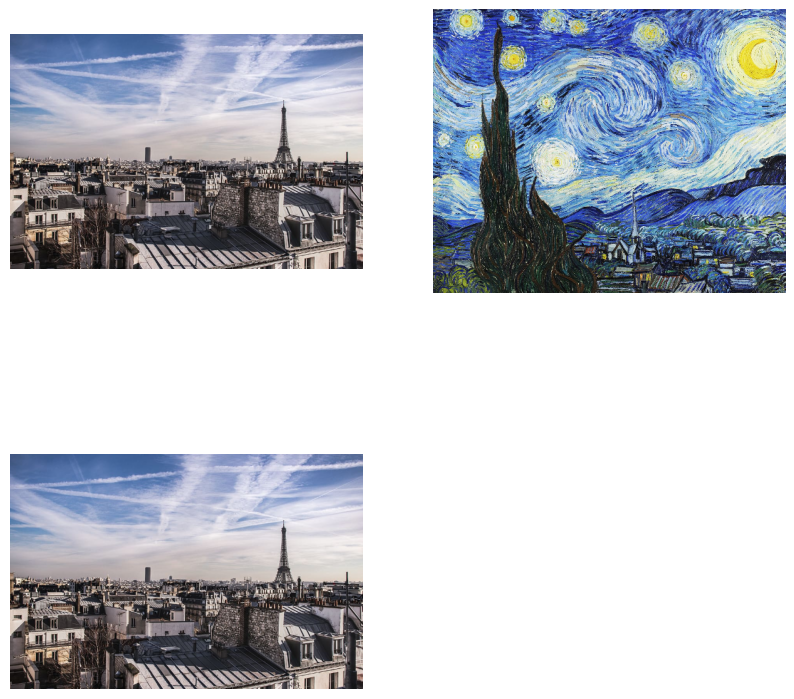

In [8]:
# Path of the content and style images in directory
content_path = 'Tensorflow dump/contentimage.jpg'
style_path = "Tensorflow dump/styleimage.jpg"

# Importing all the images and setting the combination image as the content image
content_img = Functions.import_img(content_path,img_rows=400)
style_img = Functions.import_img(style_path,img_rows=400)
combination_img = Functions.import_img(content_path,img_rows=400)

# Preprocessing all the images to be ready to be trained on
content_img = Functions.preprocess_img(content_img)
style_img = Functions.preprocess_img(style_img)
combination_img = Functions.preprocess_img(combination_img)
# Set the combination img as Variable (because this image is to be trained)
combination_img = tf.Variable(combination_img)

# Show all the images before training
Functions.show(content_img,style_img,combination_img)

In [9]:
# Instantiate the NST model and pass in the image to be trained
model = classes.NST(combination_img)
# Compile the NST model
model.compile()
# Make a dataset out of the content and style image to be ready to fed into the fit function
input = tf.data.Dataset.from_tensor_slices((content_img,style_img)).prefetch(tf.data.AUTOTUNE).cache()
# Fit the model on the training images
history = model.fit(input,epochs=100,verbose=1)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - content loss: 0.0000e+00 - style loss: 135.0502 - total loss: 135.0502
Epoch 2/100
1/1 [==============================] - 1s 672ms/step - content loss: 1352.8418 - style loss: 41.6729 - total loss: 1394.5146
Epoch 3/100
1/1 [==============================] - 1s 670ms/step - content loss: 1121.5155 - style loss: 46.3372 - total loss: 1167.8528
Epoch 4/100
1/1 [==============================] - 1s 670ms/step - content loss: 824.2584 - style loss: 49.2623 - total loss: 873.5207
Epoch 5/100
1/1 [==============================] - 1s 669ms/step - content loss: 613.7769 - style loss: 52.1398 - total loss: 665.9167
Epoch 6/100
1/1 [==============================] - 1s 669ms/step - content loss: 514.5407 - style loss: 54.1312 - total loss: 568.6719
Epoch 7/100
1/1 [==============================] - 1s 668ms/step - content loss: 443.3163 - style loss: 55.5371 - total loss: 498.8535
Epoch 8/100
1/1 [==============================] - 

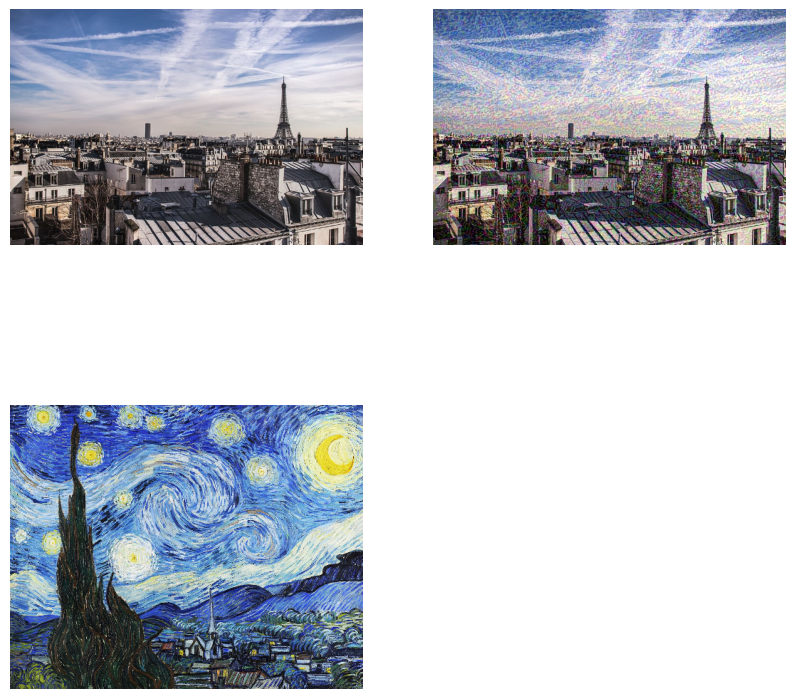

In [10]:
# Deprocess all the images
content_img = Functions.deprocess_image(content_img)
style_img = Functions.deprocess_image(style_img)
combination_img = Functions.deprocess_image(model.result())

# Show all the images after training
Functions.show(content_img,combination_img,style_img)